In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

2023-05-20 13:20:55.108755: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-20 13:20:55.172226: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-20 13:20:55.173171: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-20 13:20:56.437357: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
data = pd.read_csv('Google_Stock_Price_Train.csv')

In [6]:
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [7]:
prices = data['Open'].values

In [8]:
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.reshape(-1, 1))

In [9]:
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

In [10]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [11]:
sequence_length = 60

In [12]:
X_train, y_train = create_sequences(train_data, sequence_length)

# Create testing sequences
X_test, y_test = create_sequences(test_data, sequence_length)

In [13]:
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

2023-05-20 13:26:42.950681: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-20 13:26:43.006361: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [14]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
30/30 [==============================] - 1s 11ms/step - loss: 0.0084
Epoch 2/50
30/30 [==============================] - 0s 11ms/step - loss: 0.0013
Epoch 3/50
30/30 [==============================] - 0s 11ms/step - loss: 9.2496e-04
Epoch 4/50
30/30 [==============================] - 0s 11ms/step - loss: 7.8125e-04
Epoch 5/50
30/30 [==============================] - 0s 11ms/step - loss: 7.1348e-04
Epoch 6/50
30/30 [==============================] - 0s 11ms/step - loss: 6.2291e-04
Epoch 7/50
30/30 [==============================] - 0s 11ms/step - loss: 6.3758e-04
Epoch 8/50
30/30 [==============================] - 0s 11ms/step - loss: 5.4582e-04
Epoch 9/50
30/30 [==============================] - 0s 11ms/step - loss: 5.6214e-04
Epoch 10/50
30/30 [==============================] - 0s 11ms/step - loss: 5.1241e-04
Epoch 11/50
30/30 [==============================] - 0s 11ms/step - loss: 4.8467e-04
Epoch 12/50
30/30 [==============================] - 0s 11ms/step - loss: 4.7038e-

In [15]:
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

6/6 [==============================] - 0s 5ms/step - loss: 2.8628e-04
Test Loss: 0.00028628396103158593


In [16]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

6/6 [==============================] - 0s 4ms/step


In [17]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_prices))
print('RMSE:', rmse)

RMSE: 754.1020325348413


In [18]:
mape = mean_absolute_percentage_error(y_test, predicted_prices)
print('MAPE:', mape)

MAPE: 858.0717446526209


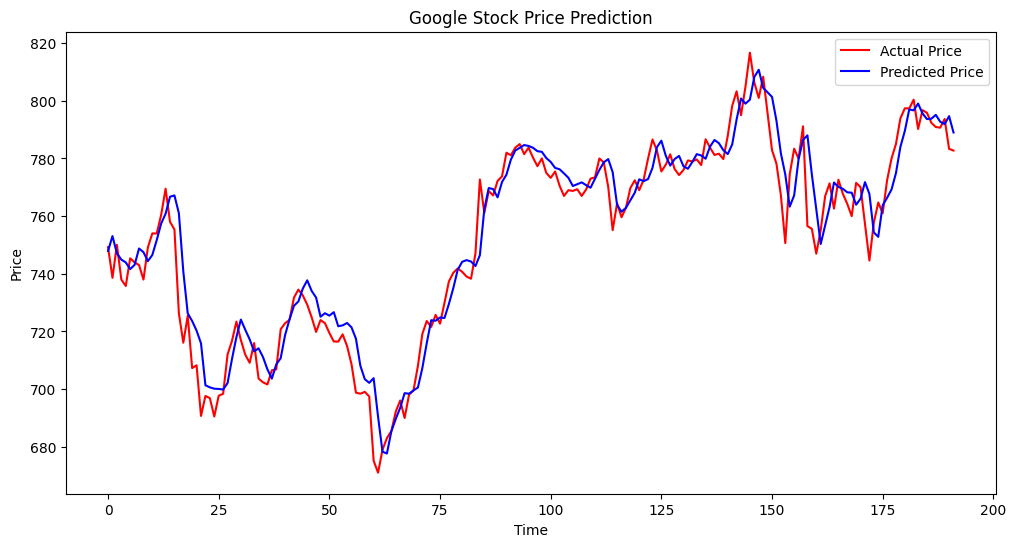

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(prices[train_size + sequence_length:], color='red', label='Actual Price')
plt.plot(predicted_prices, color='blue', label='Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
